#### Visualizing Time Series Data

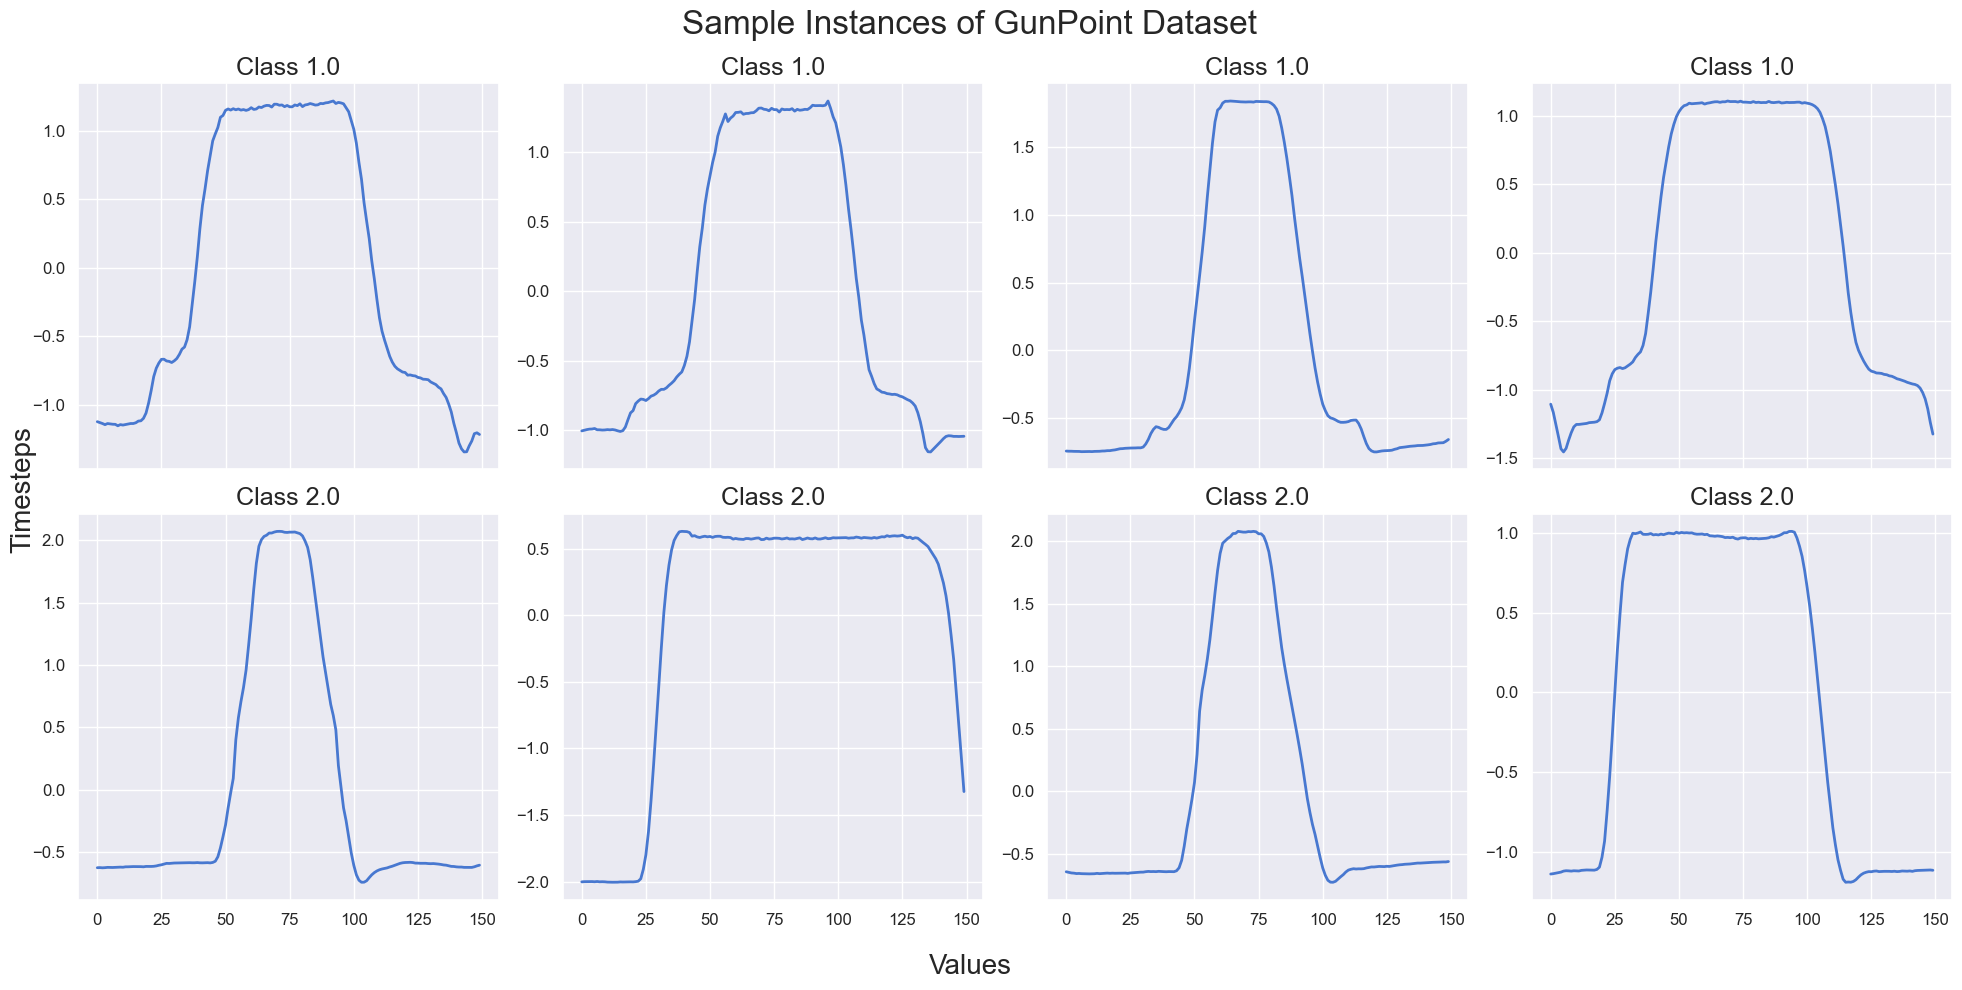

In [5]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt 
from utils.utils import read_dataset
import math
import seaborn as sns 



def plot_timeseries_data(samples, labels, title, hspace=0.2):
    assert len(samples) % 4 == 0


    sns.set(style="darkgrid", palette="muted")
    n_samples = len(samples)
    n_cols = 4
    n_rows = math.ceil(n_samples / n_cols)
    figsize = (20, 10)
    fig, axs = plt.subplots(n_rows, n_cols, sharex=True, figsize=figsize)

    for i in range(n_samples):
        row = i // n_cols
        col = i % n_cols
        axs[row, col].plot(samples[i].flatten(), linewidth=2)
        axs[row, col].set_title(f"Class {labels.flatten()[i] if labels.flatten()[i]  != -1 else  2}", fontsize=18)
        #axs[row, col].set_ylabel("Value", fontsize=10)
        axs[row, col].tick_params(labelsize=12)

    fig.supxlabel('Values',fontsize=20)
    fig.supylabel('Timesteps',fontsize=20)
    plt.subplots_adjust(hspace=hspace,wspace=0.1)
    plt.suptitle(title,fontsize=24)
    plt.tight_layout()
    plt.show()

x_train,y_train,x_test,y_test = read_dataset(".","ucr","GunPoint", "original", 1)["GunPoint"]
sample_values = list(np.where(y_test.flatten()==1)[0][:4])+list(np.where(y_test.flatten()==2)[0][:4])
plot_timeseries_data(x_test[sample_values],y_test[sample_values],"Sample Instances of GunPoint Dataset")


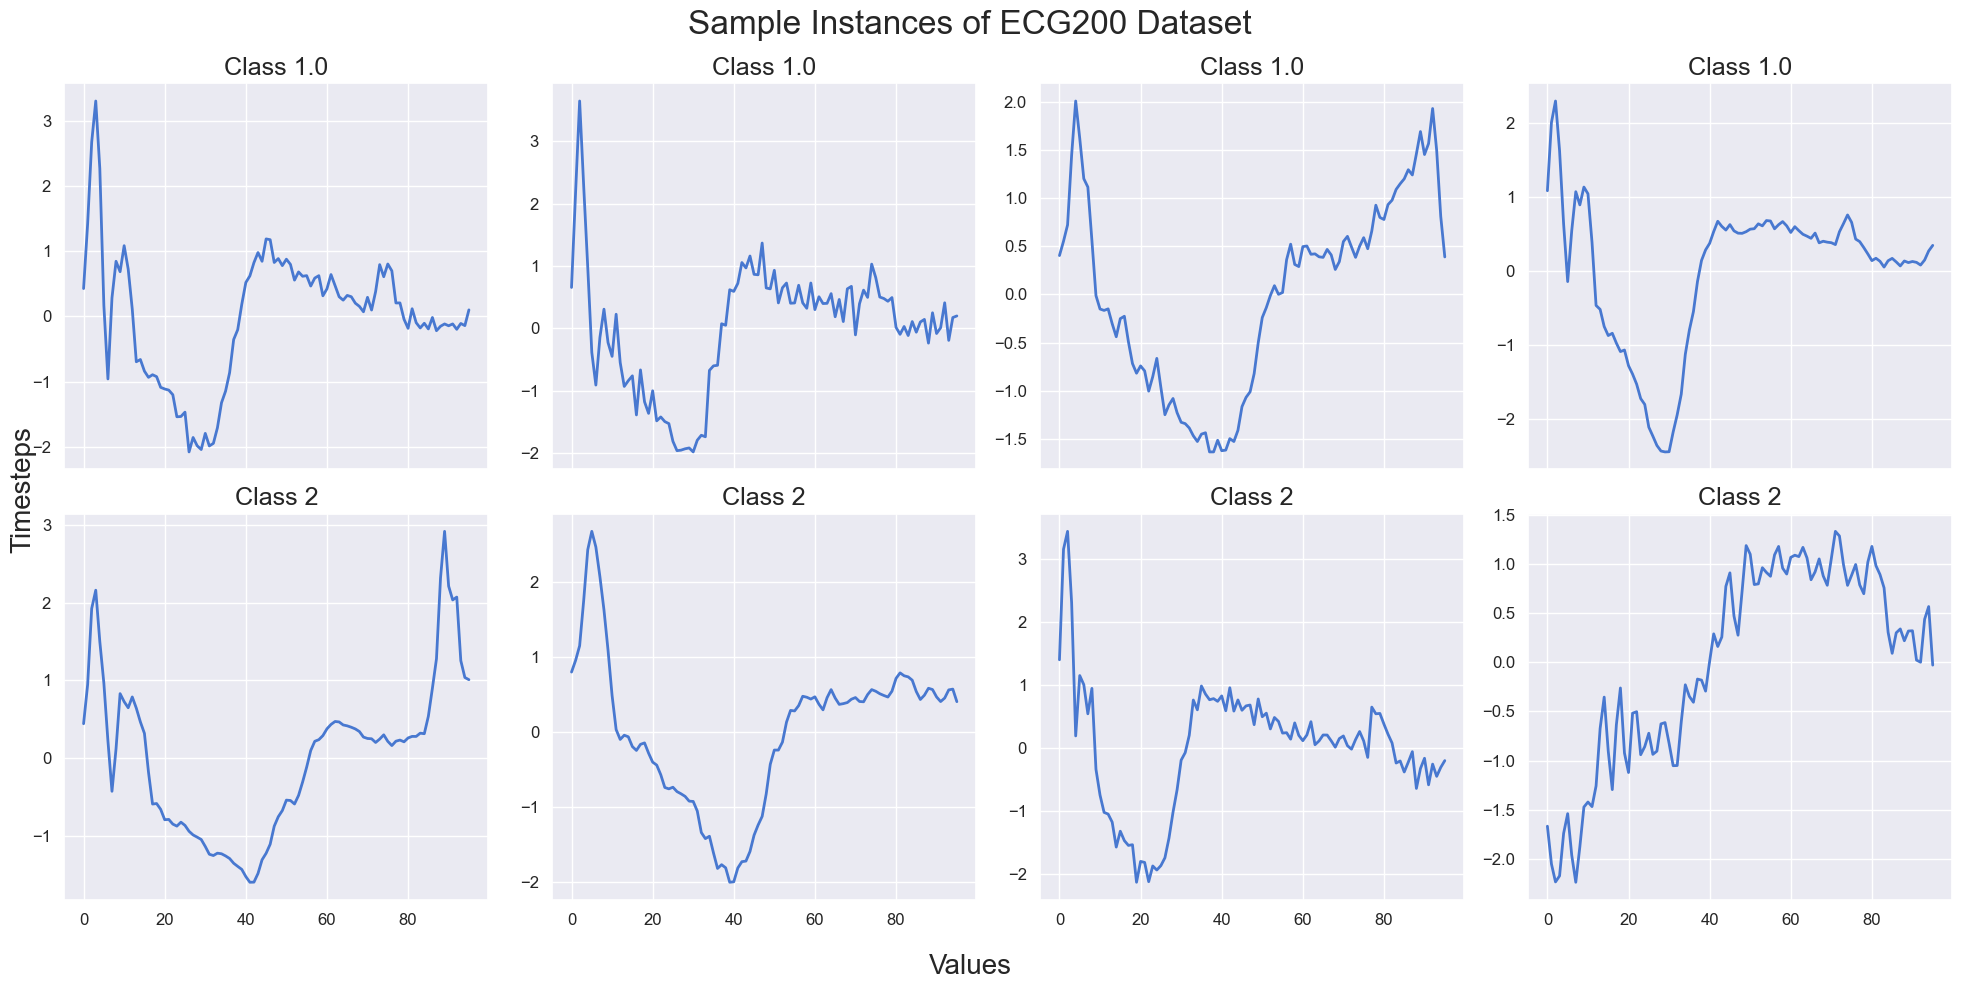

In [111]:
dataset = "ECG200"

x_train,y_train,x_test,y_test = read_dataset(".","ucr",dataset, "original", 1)[dataset]
sample_values = list(np.where(y_test.flatten()==1)[0][:4])+list(np.where(y_test.flatten()==-1)[0][:4])
plot_timeseries_data(x_test[sample_values],y_test[sample_values],f"Sample Instances of {dataset} Dataset")

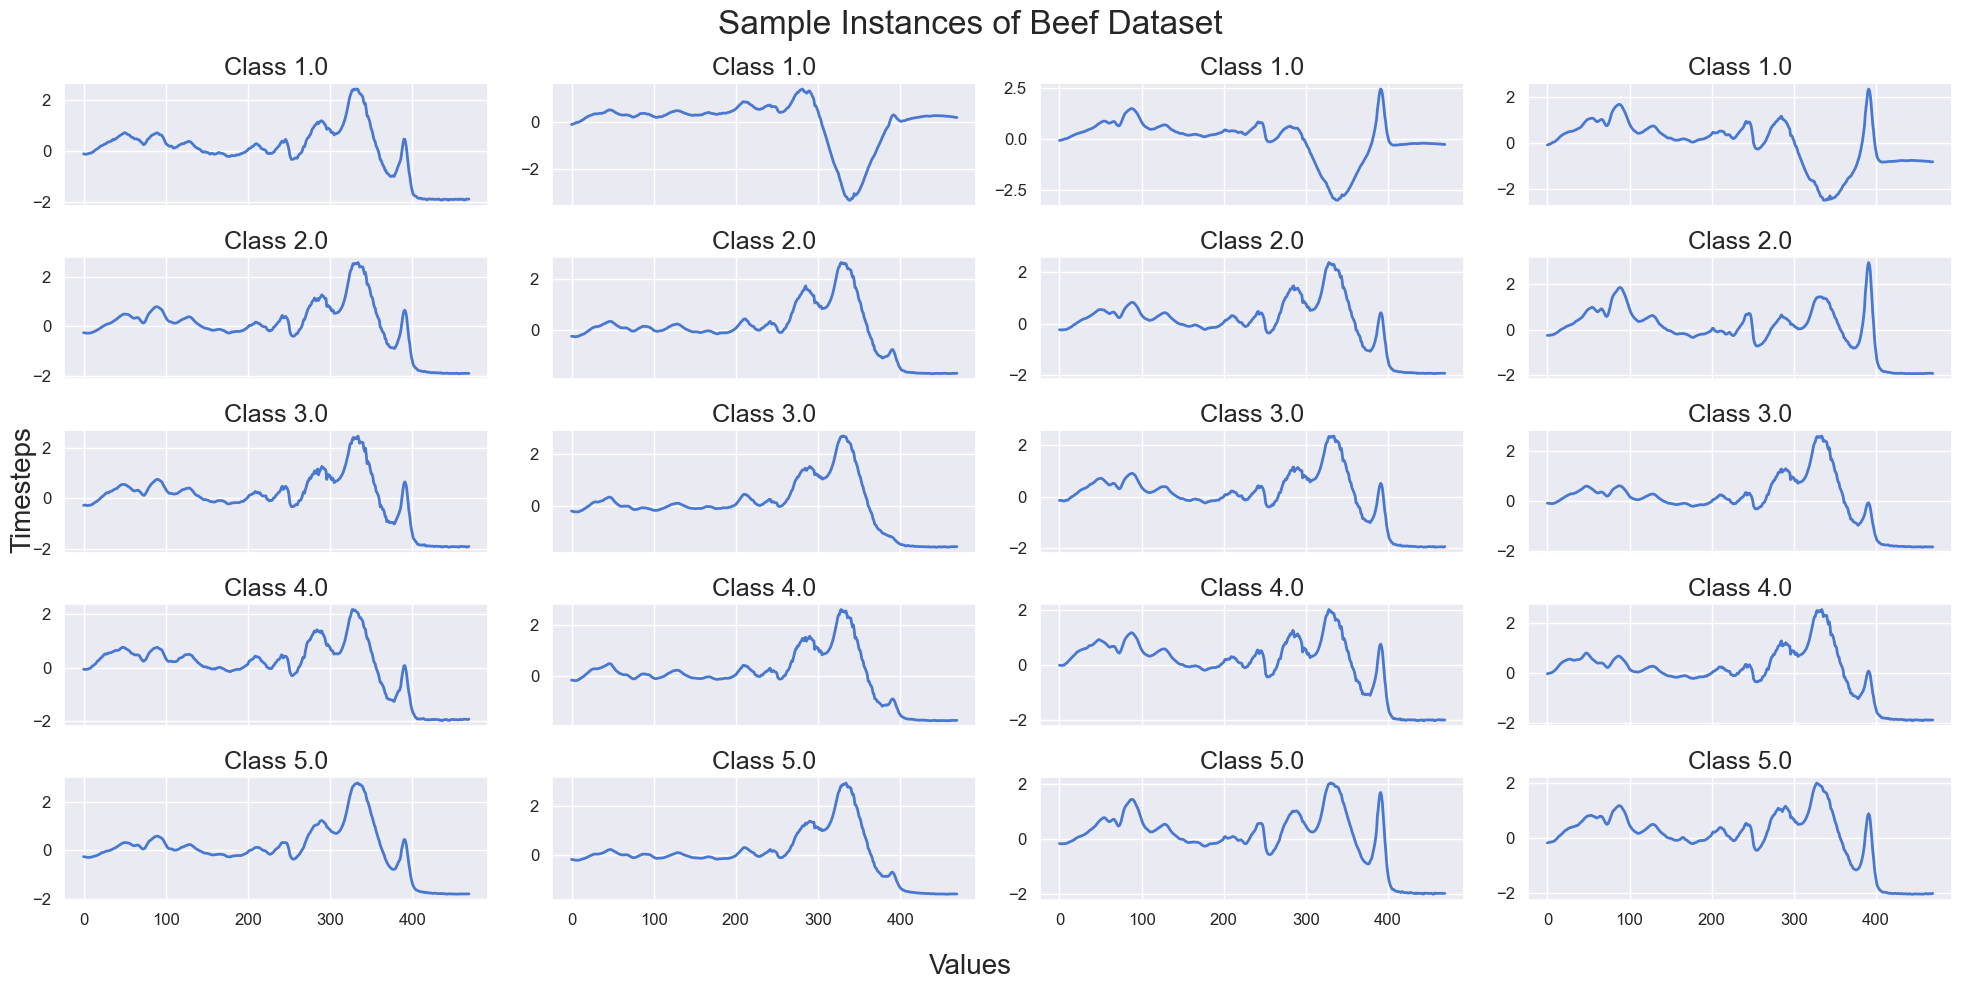

In [112]:
dataset = "Beef"
x_train,y_train,x_test,y_test = read_dataset(".","ucr",dataset, "original", 1)[dataset]
sample_values = list(np.where(y_test.flatten()==1)[0][:4])+list(np.where(y_test.flatten()==2)[0][:4])+list(np.where(y_test.flatten()==3)[0][:4])+list(np.where(y_test.flatten()==4)[0][:4])+list(np.where(y_test.flatten()==5)[0][:4])
plot_timeseries_data(x_test[sample_values],y_test[sample_values],f"Sample Instances of {dataset} Dataset",hspace=0.4)


In [2]:
%matplotlib inline


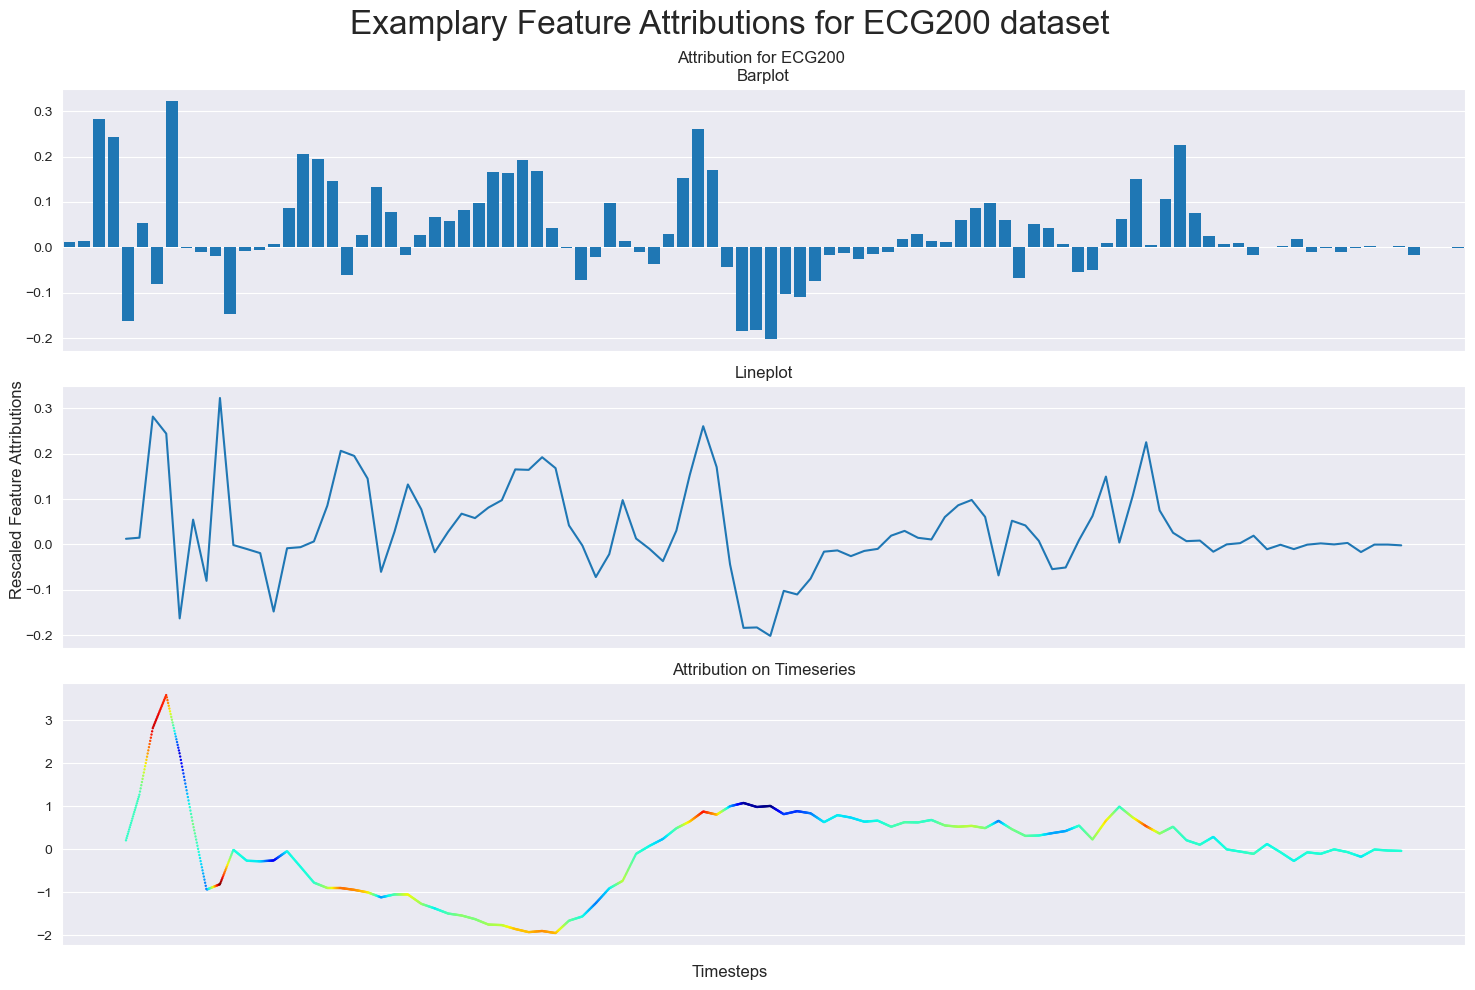

In [4]:
%matplotlib inline
import matplotlib.pyplot as plt 
from utils.utils import read_dataset 
from utils.explanations import norm
import seaborn as sns
import numpy as np
#sns.set()
#sns.set_palette("husl")

from scipy.interpolate import interp1d
def prepare_visualize_attribution(ts,attribution):
    max_length = 2000    
    #prepare values
    minimum = np.min(attribution)
    cas = attribution - minimum
    cas = cas / max(cas)
    cas = cas * 100
    xv= np.linspace(0, len(ts) - 1, max_length, endpoint=True)
    f = interp1d(range(len(ts)),ts)
    yv = f(xv)
    f = interp1d(range(len(ts)),cas)
    cas = f(xv).astype(int)
    return xv,yv,cas


archive = 'ucr'
dataset = 'ECG200'
data_p = 'G:/Meine Ablage/master thesis/code/xai-tsc'

#palette = sns.color_palette("Spectral", as_cmap=True)

def visualize_experiment_1(dataset, model, ts, train):
    sns.set_style("darkgrid")
    fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(15, 10))
    
    model_type = "fcn"
    ylen = 1 
    data = read_dataset(data_p, archive, dataset, 'original', ylen)[dataset]
    ylen = len(data[0][0])
    ig_data_stl = read_dataset(data_p, archive, dataset, f'{model_type}_ig_norm', ylen)[dataset]

    # Get x and y values for Seaborn's barplot
    x_values = np.arange(len(norm(ig_data_stl[3][ts])))
    y_values = norm(ig_data_stl[3][ts])

    # Use Seaborn's barplot for the first row
    plot_on_ts = prepare_visualize_attribution(ig_data_stl[2][ts], y_values)
    sns.barplot(x=x_values, y=y_values, ax=axes[0], linewidth=0,color = "tab:blue",saturation=1)
    #axes[0][idx].bar(x_values,y_values)
    axes[0].set_title(f'Attribution for {dataset} \nBarplot')
    axes[0].set_xticks([])

    # Line plot for the second row
    sns.lineplot(x=x_values, y=y_values, ax=axes[1])
    axes[1].set_title(f'Lineplot')
    axes[1].set_xticks([])

    # Scatter plot with colormap for the third row
    axes[2].scatter(plot_on_ts[0], plot_on_ts[1], c=plot_on_ts[2], cmap='jet', s=0.5)
    axes[2].set_title(f'Attribution on Timeseries')
    axes[2].set_xticks([])

    fig.suptitle(f"Examplary Feature Attributions for {dataset} dataset", fontsize=24)
    fig.supxlabel("Timesteps")
    fig.supylabel("Rescaled Feature Attributions")
    plt.tight_layout()


visualize_experiment_1('ECG200','fcn_mt_ae',5, train=False)

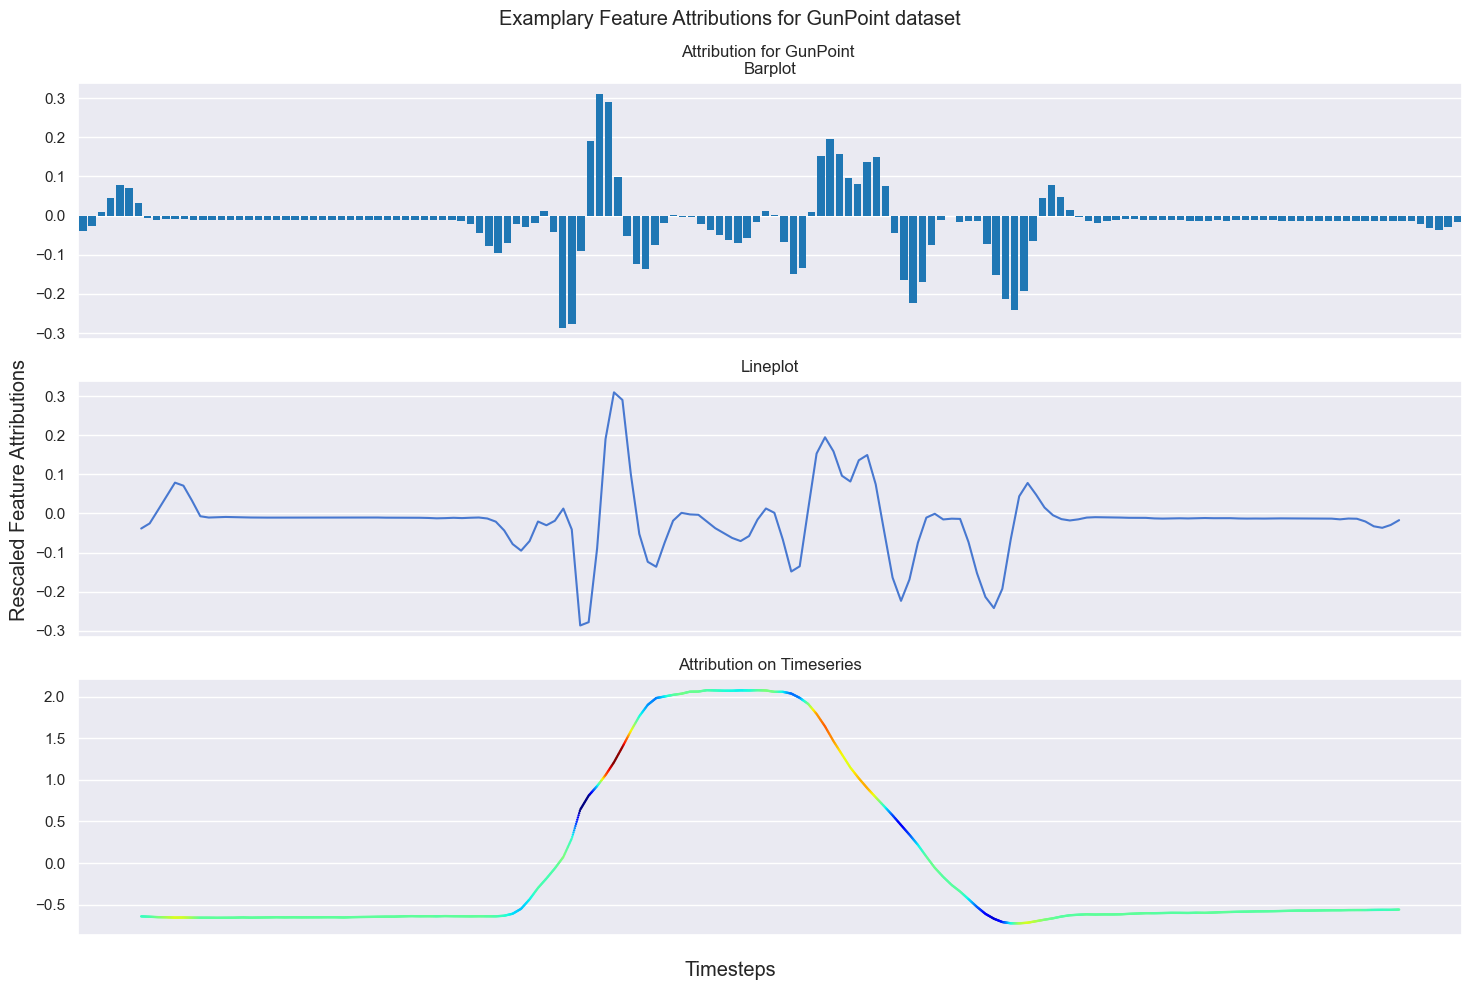

In [117]:
visualize_experiment_1('GunPoint','fcn_mt_ae',5, train=False)

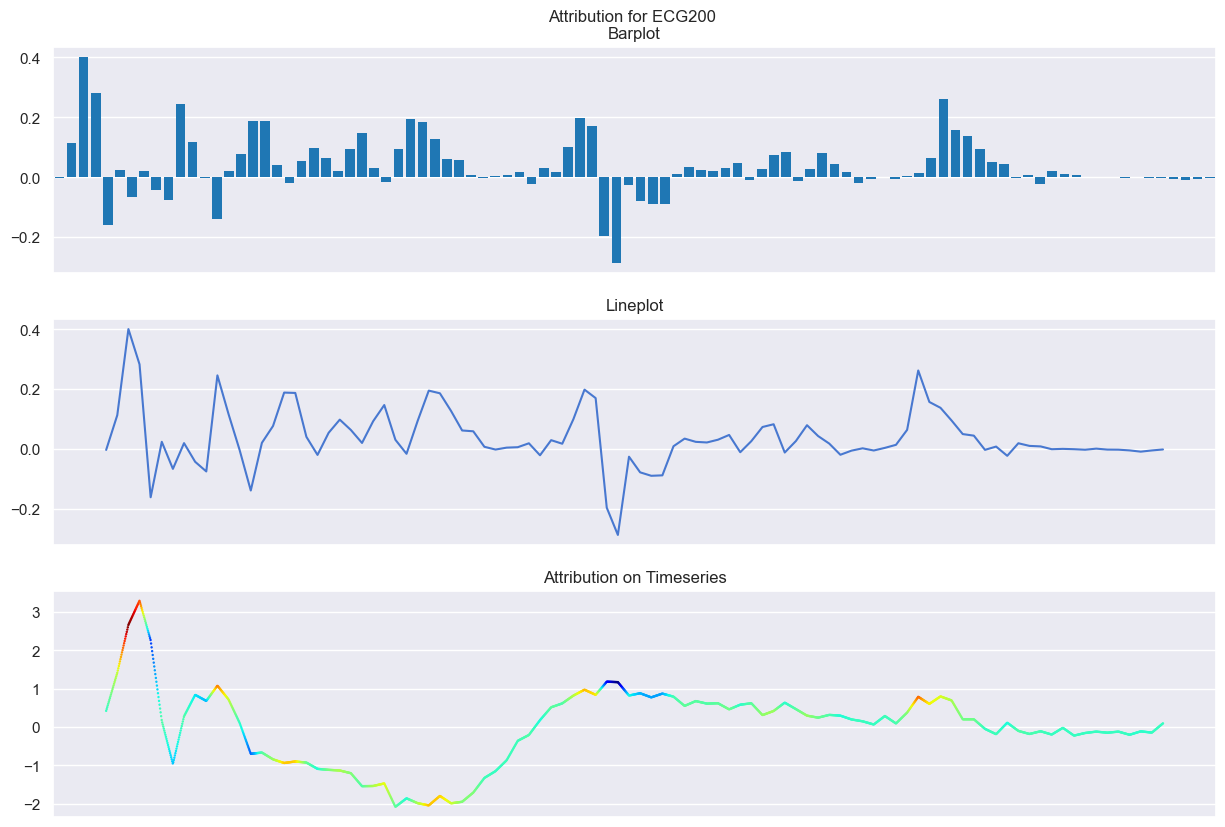

In [9]:
visualize_experiment_1('ECG200','fcn_mt_ae',0, train=False)


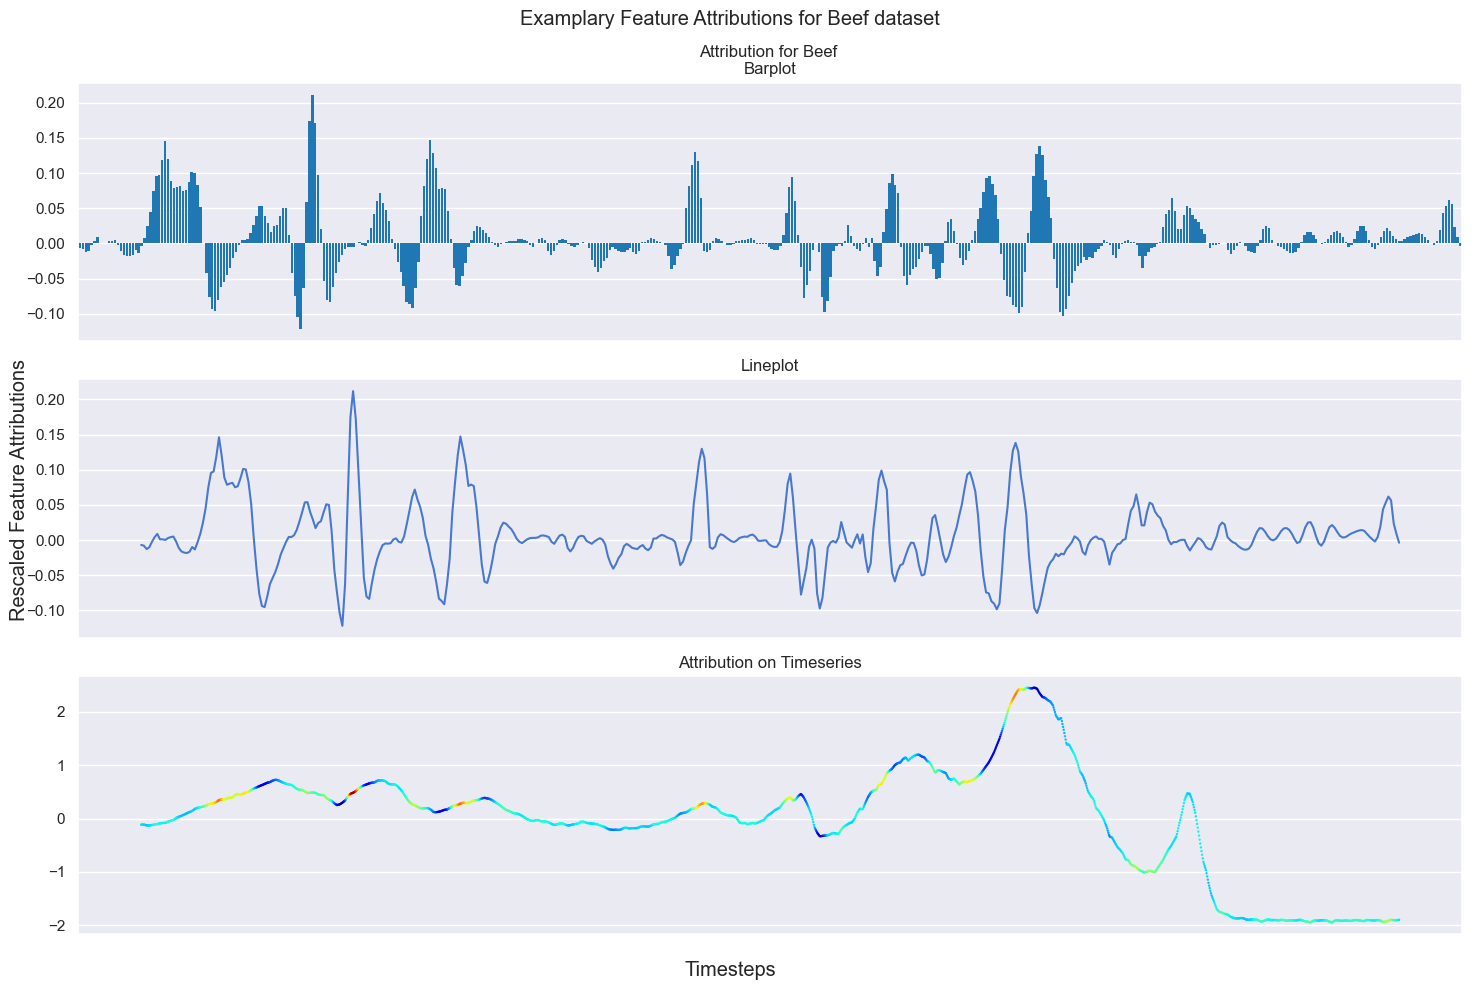

In [118]:
visualize_experiment_1('Beef','fcn_mt_ae',0, train=False)

In [6]:
import tensorflow as tf

def show_interpolation():
    def interpolate_series(baseline,
                          series,
                          alphas):
      alphas_x = alphas[:,tf.newaxis]
      baseline_x = tf.expand_dims(baseline, axis=0)
      input_x = tf.expand_dims(series, axis=0)
      delta = tf.expand_dims((series - baseline),axis=0)
      series = baseline_x +  alphas_x * delta
      return series

    m_steps = 5
    batch_size = 4
    archive = 'ucr'
    dataset = 'ECG200'
    data_p = 'G:/Meine Ablage/master thesis/code/xai-tsc'
    ylen = 1
    data = read_dataset(data_p, archive, dataset, 'original', ylen)[dataset]
    baseline = np.zeros(96)
    alphas = tf.linspace(start=0.0, stop=1.0, num=m_steps+1)
    # Initialize TensorArray outside loop to collect gradients.    

    gradient_batches = tf.TensorArray(tf.float32, size=m_steps+1)

    # Iterate alphas range and batch computation for speed, memory efficiency, and scaling to larger m_steps.
    for alpha in tf.range(0, len(alphas), batch_size):
        from_ = alpha
        to = tf.minimum(from_ + batch_size, len(alphas))
        alpha_batch = alphas[from_:to]
        interpolate_series(baseline, data[2][0],alpha_batch)

### Visualize Experiment 4: 
-  show difference between feature targets, actual targets and prediction

G:/Meine Ablage/master thesis/code/xai-tsc/results/ucr/GunPoint//experiment_2/resnet/resnet_mt_ae_0.5_0/resnet_ig_norm/best_model.hdf5
5/5 [==============================] - 2s 44ms/step


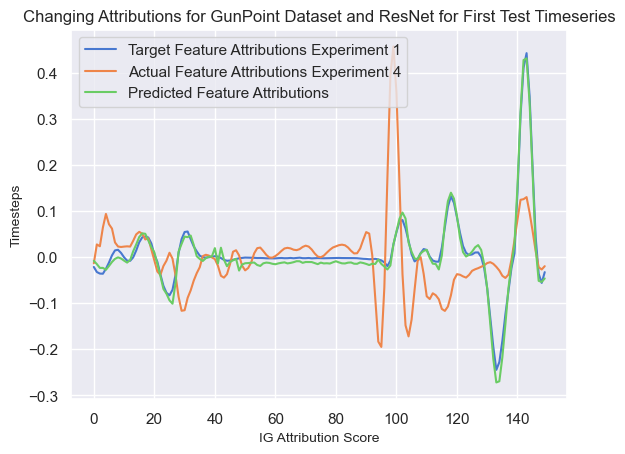

In [7]:
from utils.explanations import calculate_ig_attributions
import tensorflow.keras as keras
def visualize_experiment_4(ts,model_type, ylen, dataset): 
    model_type = "resnet"
    dataset = "GunPoint"
    archive = 'ucr'
    itr = 0
    form = "norm"
    ig_data_stl = read_dataset(data_p, archive, dataset, f'{model_type}_ig_norm', ylen)[dataset]
    root_dir = 'G:/Meine Ablage/master thesis/code/xai-tsc'
    model = "resnet_mt_ae_0.5"
    ig_atts = calculate_ig_attributions(root_dir, archive, f"{model}_{itr}", dataset, f"{model_type}_ig_{form}", task=1, experiment=2, scale="normalized")
    model_path = f'{root_dir}/results/{archive}/{dataset}/Experiment_2/' \
                                        + f'{model_type}/{model}_{itr}/{model_type}_ig_{form}/' \
                                        + f'best_model.hdf5'
    model = keras.models.load_model(model_path ,compile=False)
    plt.title("Changing Attributions for GunPoint Dataset and ResNet for First Test Timeseries")
    plt.xlabel('Timesteps', fontsize=10)
    plt.ylabel('IG Attribution Score', fontsize=10)
    predicted = model.predict(ig_data_stl[2])[1][ts]
    plt.plot(ig_data_stl[3][ts], label="Target Feature Attributions Experiment 1")
    plt.plot(ig_atts[1][ts][2], label="Actual Feature Attributions Experiment 4")
    plt.plot(predicted.flatten(), label="Predicted Feature Attributions")
    plt.legend(loc="upper left")

visualize_experiment_4(0,None, 150, None)


G:/Meine Ablage/master thesis/code/xai-tsc/results/ucr/GunPoint//experiment_4/resnet/resnet_mt_ae_iter_0.5_0/resnet_ig_norm/best_model.hdf5
5/5 [==============================] - 2s 46ms/step


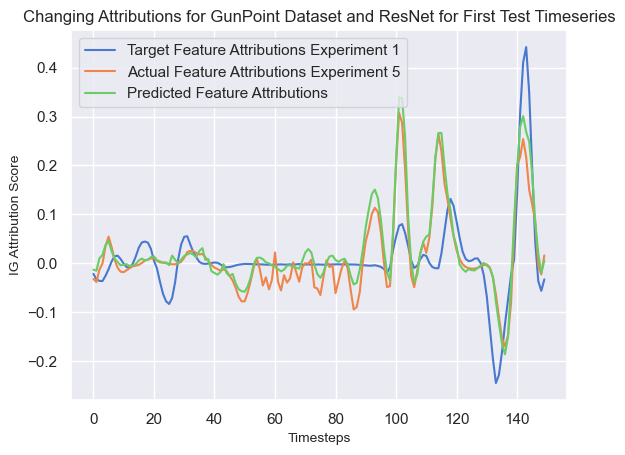

In [9]:
def visualize_experiment_5(ts,model_type, ylen, dataset): 
    model_type = "resnet"
    dataset = "GunPoint"
    archive = 'ucr'
    itr = 0
    form = "norm"
    ig_data_stl = read_dataset(data_p, archive, dataset, f'{model_type}_ig_norm', ylen)[dataset]
    root_dir = 'G:/Meine Ablage/master thesis/code/xai-tsc'
    model = "resnet_mt_ae_iter_0.5"
    ig_atts = calculate_ig_attributions(root_dir, archive, f"{model}_{itr}", dataset, f"{model_type}_ig_{form}", task=1, experiment=4, scale="normalized")
    model_path = f'{root_dir}/results/{archive}/{dataset}/Experiment_4/' \
                                        + f'{model_type}/{model}_{itr}/{model_type}_ig_{form}/' \
                                        + f'best_model.hdf5'
    model = keras.models.load_model(model_path ,compile=False)
    plt.title("Changing Attributions for GunPoint Dataset and ResNet for First Test Timeseries")
    plt.xlabel('Timesteps', fontsize=10)
    plt.ylabel('IG Attribution Score', fontsize=10)
    predicted = model.predict(ig_data_stl[2])[1][ts]
    plt.plot(ig_data_stl[3][ts], label="Target Feature Attributions Experiment 1")
    plt.plot(ig_atts[1][ts][2], label="Actual Feature Attributions Experiment 5")
    plt.plot(predicted.flatten(), label="Predicted Feature Attributions")
    plt.legend(loc="upper left")



#0,10,13,3
visualize_experiment_5(0,None, 150, None)